In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip uninstall -y datasets
!pip install datasets==2.18.0


In [1]:
from datasets import load_dataset
import pandas as pd


INDO NLU

In [2]:
from datasets import load_dataset

emot = load_dataset("indonlp/indonlu", "emot")
smsa = load_dataset("indonlp/indonlu", "smsa")
nerp = load_dataset("indonlp/indonlu", "nerp")


print("=== EMOT ===")
print(emot)

print("\n=== SMSA ===")
print(smsa)

print("\n=== NERP ===")
print(nerp)


/usr/local/lib/python3.11/dist-packages/datasets/load.py:1461: FutureWarning: The repository for indonlp/indonlu contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/indonlp/indonlu
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/3521 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/440 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/440 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/load.py:1461: FutureWarning: The repository for indonlp/indonlu contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/indonlp/indonlu
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/11000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1260 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/6720 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/840 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/840 [00:00<?, ? examples/s]

=== EMOT ===
DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 3521
    })
    validation: Dataset({
        features: ['tweet', 'label'],
        num_rows: 440
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 440
    })
})

=== SMSA ===
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 11000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1260
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 500
    })
})

=== NERP ===
DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 6720
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 840
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 840
    })
})


In [4]:
emot_labels = emot["train"].features["label"].names
print("Emotion labels:", emot_labels)

pd.DataFrame(emot["train"][:5])

Emotion labels: ['sadness', 'anger', 'love', 'fear', 'happy']


,tweet,label
0,Ini adalah hal yang paling membahagiakan saat ...,4
1,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,1
2,yaudah kalo emang belum berani potong rambut p...,3
3,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",3
4,temen2 masa kecil yang turned out being asshol...,1


In [5]:
smsa_labels = smsa["train"].features["label"].names
print("Sentiment labels:", smsa_labels)

pd.DataFrame(smsa["train"][:5])


Sentiment labels: ['positive', 'neutral', 'negative']


,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,0
1,mohon ulama lurus dan k212 mmbri hujjah partai...,1
2,lokasi strategis di jalan sumatera bandung . t...,0
3,betapa bahagia nya diri ini saat unboxing pake...,0
4,duh . jadi mahasiswa jangan sombong dong . kas...,2


In [6]:
nerp_labels = nerp["train"].features["ner_tags"].feature.names
print("NER labels:", nerp_labels)

nerp_sample = nerp["train"][:3]

for i in range(3):
    print(f"\nSample {i+1}")
    print("Tokens :", nerp_sample["tokens"][i])
    print("NER tags :", nerp_sample["ner_tags"][i])


NER labels: ['I-PPL', 'B-EVT', 'B-PLC', 'I-IND', 'B-IND', 'B-FNB', 'I-EVT', 'B-PPL', 'I-PLC', 'O', 'I-FNB']

Sample 1
Tokens : ['kepala', 'dinas', 'tata', 'kota', 'manado', 'amos', 'kenda', 'menyatakan', 'tidak', 'tahu', '-', 'menahu', 'soal', 'pencabutan', 'baliho', '.', 'ia', 'enggan', 'berkomentar', 'banyak', 'karena', 'merasa', 'bukan', 'kewenangannya', '.']
NER tags : [9, 9, 9, 9, 2, 7, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

Sample 2
Tokens : ['di', 'antara', 'mereka', 'itu', 'mengaku', 'tidak', 'tersinggung', 'dengan', 'ucapan', 'ahok', '...']
NER tags : [9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9]

Sample 3
Tokens : ['pasukan', 'pengibar', 'bendera', 'membawa', 'kereta', 'kencana', 'usai', 'latihan', 'upacara', 'pengibaran', 'bendera', 'jelang', 'perayaan', 'hut', 'kemerdekaan', 'ri', 'di', 'monas', ',', 'gambr', ',', 'jakarta', 'pusat', ',', 'minggu', '(', '13', '/', '8', ')', '.']
NER tags : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 2, 9, 9, 9, 2, 8, 9, 9, 9,

“Dataset IndoNLU terdiri dari beberapa sub-tugas NLU. Contoh data dari masing-masing sub-tugas ditampilkan untuk menunjukkan struktur dan karakteristik data.”

INDO QUESTION ANSWERING

In [7]:
import os

for root, dirs, files in os.walk("/kaggle/input"):
    print(root)
    for f in files:
        print("  ", f)


/kaggle/input
/kaggle/input/uad-id
   train-SQuAD-id.json


In [8]:
from datasets import load_dataset

dataset = load_dataset(
    "json",
    data_files="/kaggle/input/uad-id/train-SQuAD-id.json"
)

print(dataset)


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['version', 'data'],
        num_rows: 1
    })
})


In [9]:
sample = dataset["train"][0]
print(sample.keys())


dict_keys(['version', 'data'])


In [10]:
data = dataset["train"][0]["data"]

article = data[0]
paragraph = article["paragraphs"][0]
qa = paragraph["qas"][0]

print("QUESTION:", qa["question"])
print("ANSWER:", qa["answers"][0]["text"])
print("CONTEXT:", paragraph["context"][:300])


QUESTION: Kapan Beyonce mulai populer?
ANSWER: pada akhir 1990-an
CONTEXT: Beyoncé Giselle Knowles-Carter (/ biːˈjɒnseɪ / bee-YON-say) (lahir 4 September 1981) adalah seorang penyanyi, penulis lagu, produser rekaman dan aktris Amerika. Dilahirkan dan dibesarkan di Houston, Texas, ia tampil di berbagai kompetisi menyanyi dan menari sebagai seorang anak, dan mulai terkenal p


In [11]:
total_qa = 0
for article in dataset["train"][0]["data"]:
    for p in article["paragraphs"]:
        total_qa += len(p["qas"])

print("Total QA:", total_qa)


Total QA: 114825


Natural Language Generation

In [12]:
wiki_lingua_id = load_dataset(
    "wiki_lingua",
    "indonesian"
)

print(wiki_lingua_id)
print(wiki_lingua_id["train"][0])


Generating train split:   0%|          | 0/16308 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['url', 'article'],
        num_rows: 16308
    })
})
{'url': 'https://id.wikihow.com/Menghitung-Pengembalian-Portofolio-Disetahunkan', 'article': {'section_name': ['Menghitung Pengembalian Disetahunkan', 'Memahami Dasar-Dasar Perhitungan'], 'document': ['Jika tingkat pengembalian total telah dihitung, masukkan hasilnya ke persamaan berikut: Pengembalian Disetahunkan=(1+ Pengembalian)1/N-1 Hasil persamaan ini sesuai dengan pengembalian investasi setiap tahunnya selama rentang waktu yang diukur.  Di dalam eksponen (pangkat), angka “1” mencerminkan unit yang diukur, yaitu 1 tahun. Jika ingin lebih spesifik, Anda boleh menggunakan “365” untuk menghitung pengembalian harian. Huruf “N” mencerminkan  jumlah periode yang diukur. Oleh karenanya, jika Anda menghitung pengembalian selama 7 tahun, tukar huruf “N” dengan angka 7. Sebagai contoh, katakanlah selama tujuh tahun portofolio Anda tumbuh dari Rp1.000.000 menjadi Rp2.500.000. Pertama-ta

In [13]:
print(wiki_lingua_id.column_names)


{'train': ['url', 'article']}


Menghasilkan ringkasan teks Bahasa Indonesia dari artikel Wikipedia menggunakan pendekatan Unsupervised Natural Language Generation

Preprocesssing

Preprocessing Final (Clean & Ready)

In [14]:
from datasets import load_dataset
from transformers import AutoTokenizer

# 1. SETUP AWAL
# Kita hanya panggil "Kamus" (Tokenizer) nya saja, bukan Model AI-nya.
checkpoint = "prajjwal1/bert-tiny" 
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Load Dataset
emot = load_dataset("indonlp/indonlu", "emot")
smsa = load_dataset("indonlp/indonlu", "smsa")
nerp = load_dataset("indonlp/indonlu", "nerp")

# ======================================================
# FUNGSI 1: Untuk Klasifikasi (SMSA & EMOT)
# ======================================================
def process_classification(examples):
    # Deteksi nama kolom teks (karena beda-beda tiap dataset)
    text_col = "tweet" if "tweet" in examples else "text"
    
    # Ubah Teks -> Angka (Input IDs)
    tokenized = tokenizer(
        examples[text_col], 
        truncation=True, 
        max_length=128,      # Batasi panjang kalimat
        padding="max_length" # Samakan panjang semua kalimat
    )
    
    # Ambil label angka (0, 1, 2) dan simpan di kolom 'labels'
    # Penting: Jangan diubah jadi string! Biarkan integer.
    tokenized["labels"] = examples["label"]
    
    return tokenized

# ======================================================
# FUNGSI 2: Untuk NER (NERP) - Lebih Rumit
# ======================================================
def process_ner(examples):
    # Tokenisasi list kata (karena NER inputnya per kata)
    tokenized_inputs = tokenizer(
        examples["tokens"], 
        truncation=True, 
        is_split_into_words=True, # Wajib True!
        max_length=128,
        padding="max_length"
    )

    labels = []
    # Loop setiap kalimat
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i) # Mapping token ke kata asli
        previous_word_idx = None
        label_ids = []
        
        for word_idx in word_ids:
            # Jika token spesial ([CLS], [SEP], [PAD]) -> label -100 (diabaikan)
            if word_idx is None:
                label_ids.append(-100)
            # Jika token kata baru -> ambil label aslinya
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # Jika token pecahan kata (subword) -> label -100
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
            
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

# ======================================================
# EKSEKUSI (Jalankan Preprocessing)
# ======================================================

print("Sedang memproses SMSA...")
smsa_ready = smsa.map(
    process_classification, 
    batched=True, 
    remove_columns=smsa["train"].column_names # Hapus kolom mentah
)

print("Sedang memproses EMOT...")
emot_ready = emot.map(
    process_classification, 
    batched=True, 
    remove_columns=emot["train"].column_names
)

print("Sedang memproses NERP (NER)...")
nerp_ready = nerp.map(
    process_ner, 
    batched=True, 
    remove_columns=nerp["train"].column_names
)

# ======================================================
# HASIL AKHIR
# ======================================================
print("\nSukses! Data sudah bersih.")
print("Contoh data SMSA (siap training):", smsa_ready["train"][0].keys())
# Output keys harus: ['input_ids', 'token_type_ids', 'attention_mask', 'labels']

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/datasets/load.py:1461: FutureWarning: The repository for indonlp/indonlu contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/indonlp/indonlu
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Sedang memproses SMSA...


Map:   0%|          | 0/11000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1260 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Sedang memproses EMOT...


Map:   0%|          | 0/3521 [00:00<?, ? examples/s]

Map:   0%|          | 0/440 [00:00<?, ? examples/s]

Map:   0%|          | 0/440 [00:00<?, ? examples/s]

Sedang memproses NERP (NER)...


Map:   0%|          | 0/6720 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]


Sukses! Data sudah bersih.
Contoh data SMSA (siap training): dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


Cek Apakah Angkanya Benar (Decode)

In [16]:
# Cek 1 Sampel dari SMSA
sample = smsa_ready["train"][0]
print("=== CEK SMSA ===")
print("Input IDs:", sample["input_ids"][:10]) # Lihat 10 angka pertama
print("Label ID :", sample["labels"])

# Kembalikan ke teks asli untuk memastikan isinya bukan sampah
decoded_text = tokenizer.decode(sample["input_ids"], skip_special_tokens=True)
print("Decoded Text:", decoded_text)


# Cek 1 Sampel dari NER (PENTING! Cek angka -100 nya)
sample_ner = nerp_ready["train"][0]
print("\n=== CEK NER ===")
print("Input IDs:", sample_ner["input_ids"][:10])
print("Labels   :", sample_ner["labels"][:10]) 
# Kamu harus melihat angka -100 di antara label lain jika ada subword!

=== CEK SMSA ===
Input IDs: [101, 2162, 5575, 1999, 2072, 11737, 18622, 3211, 15589, 2232]
Label ID : 0
Decoded Text: warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung. tahu berkualitas, dipadu keahlian memasak, dipadu kretivitas, jadilah warung yang menyajikan menu utama berbahan tahu, ditambah menu umum lain seperti ayam. semuanya selera indonesia. harga cukup terjangkau. jangan lewatkan tahu b

=== CEK NER ===
Input IDs: [101, 17710, 19636, 26146, 2015, 23236, 23856, 24951, 3527, 13744]
Labels   : [-100, 9, -100, 9, -100, 9, 9, 2, -100, 7]


Langkah Terakhir: Save

In [17]:
import os

# Buat folder penampung
os.makedirs("processed_data", exist_ok=True)

# Simpan
smsa_ready.save_to_disk("processed_data/smsa_processed")
emot_ready.save_to_disk("processed_data/emot_processed")
nerp_ready.save_to_disk("processed_data/nerp_processed")

print("\nSemua data berhasil disimpan ke folder 'processed_data/'!")

Saving the dataset (0/1 shards):   0%|          | 0/11000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1260 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/500 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3521 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/440 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/440 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6720 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/840 [00:00<?, ? examples/s]


Semua data berhasil disimpan ke folder 'processed_data/'!


Preprocessing QA (SQuAD)

In [18]:
import json
from datasets import Dataset

# Lokasi file kamu
file_path = "/kaggle/input/uad-id/train-SQuAD-id.json"

def load_and_flatten_squad(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        squad_dict = json.load(f)
    
    flattened_data = []
    
    # Masuk ke struktur 'data' -> 'paragraphs' -> 'qas'
    for article in squad_dict["data"]:
        for paragraph in article["paragraphs"]:
            context = paragraph["context"]
            
            for qa in paragraph["qas"]:
                question = qa["question"]
                id_ = qa["id"]
                answers = qa["answers"]
                
                # Format ulang jawaban agar sesuai standar Hugging Face
                # Biasanya di JSON SQuAD formatnya: [{'text': '..', 'answer_start': 12}]
                # Kita butuh format: {'text': ['..'], 'answer_start': [12]}
                formatted_answers = {
                    "text": [ans["text"] for ans in answers],
                    "answer_start": [ans["answer_start"] for ans in answers]
                }
                
                flattened_data.append({
                    "id": id_,
                    "context": context,
                    "question": question,
                    "answers": formatted_answers
                })
    
    # Ubah list dictionary menjadi Hugging Face Dataset
    return Dataset.from_list(flattened_data)

# --- EKSEKUSI ---
print("Sedang meratakan struktur JSON SQuAD...")
dataset_flat = load_and_flatten_squad(file_path)

print("Sukses!")
print("Contoh data:", dataset_flat[0])
# Sekarang harusnya muncul keys: ['id', 'context', 'question', 'answers']

Sedang meratakan struktur JSON SQuAD...
Sukses!
Contoh data: {'id': '56be85543aeaaa14008c9063', 'context': 'Beyoncé Giselle Knowles-Carter (/ biːˈjɒnseɪ / bee-YON-say) (lahir 4 September 1981) adalah seorang penyanyi, penulis lagu, produser rekaman dan aktris Amerika. Dilahirkan dan dibesarkan di Houston, Texas, ia tampil di berbagai kompetisi menyanyi dan menari sebagai seorang anak, dan mulai terkenal pada akhir 1990-an sebagai penyanyi utama dari grup wanita R&B Destiny\'s Child. Dikelola oleh ayahnya, Mathew Knowles, grup ini menjadi salah satu grup wanita terlaris di dunia sepanjang masa. Jeda mereka melihat perilisan album debut Beyoncé, Dangerously in Love (2003), yang menjadikannya sebagai artis solo di seluruh dunia, meraih lima Grammy Awards dan menampilkan single nomor satu Billboard Hot 100 "Crazy in Love" dan "Baby Boy" .', 'question': 'Kapan Beyonce mulai populer?', 'answers': {'answer_start': [299], 'text': ['pada akhir 1990-an']}}


In [21]:
from transformers import AutoTokenizer

# 1. Pastikan Tokenizer sudah load
checkpoint = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# 2. DEFINISI FUNGSI PREPROCESS_QA (VERSI ANTI-CRASH)
def preprocess_qa(examples):
    max_length = 384
    doc_stride = 128

    inputs = tokenizer(
        [q.strip() for q in examples["question"]],
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=doc_stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        sample_idx = sample_map[i]
        answer = answers[sample_idx]
        
        # --- PERBAIKAN DI SINI (SABUK PENGAMAN) ---
        # Cek apakah list jawaban kosong?
        if len(answer["answer_start"]) == 0:
            # Jika kosong, arahkan ke CLS (index 0)
            start_positions.append(0)
            end_positions.append(0)
            continue # Lanjut ke data berikutnya
        # ------------------------------------------

        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        
        sequence_ids = inputs.sequence_ids(i)
        
        # Cari batas index token konteks
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

# 3. EKSEKUSI ULANG
print("Mencoba Preprocessing lagi (Versi Aman)...")
qa_processed = dataset_flat.map(
    preprocess_qa,
    batched=True,
    remove_columns=dataset_flat.column_names
)

print("✅ SUKSES! Preprocessing QA Selesai.")

Mencoba Preprocessing lagi (Versi Aman)...


Map:   0%|          | 0/114825 [00:00<?, ? examples/s]

✅ SUKSES! Preprocessing QA Selesai.


In [22]:
import os
os.makedirs("processed_data", exist_ok=True)

# Simpan SQuAD
qa_processed.save_to_disk("processed_data/squad_processed")

print("Data SQuAD aman tersimpan! ✅")

Saving the dataset (0/1 shards):   0%|          | 0/137657 [00:00<?, ? examples/s]

Data SQuAD aman tersimpan! ✅


Preprocessing WikiLingua (Khusus IndoT5)

In [23]:
from datasets import load_dataset
from transformers import AutoTokenizer

# --- PERUBAHAN DI SINI ---
# Ganti dari 'indobenchmark/indot5-base' ke 'google/mt5-small'
# mt5-small adalah versi ringan, kalau GPU kuat bisa pakai 'google/mt5-base'
checkpoint_t5 = "google/mt5-small" 

tokenizer_t5 = AutoTokenizer.from_pretrained(checkpoint_t5)

# Load Data (tidak perlu diubah)
wiki_lingua_id = load_dataset("wiki_lingua", "indonesian", ignore_verifications=True)

# Konfigurasi
prefix = "ringkas: " 
max_input_length = 512
max_target_length = 150

def preprocess_summarization_t5(examples):
    inputs = []
    targets = []
    
    for article_dict in examples["article"]:
        doc_text = " ".join(article_dict["document"]) 
        sum_text = " ".join(article_dict["summary"])
        
        inputs.append(prefix + doc_text)
        targets.append(sum_text)
    
    model_inputs = tokenizer_t5(
        inputs, 
        max_length=max_input_length, 
        truncation=True,
        padding="max_length"
    )

    with tokenizer_t5.as_target_tokenizer():
        labels = tokenizer_t5(
            targets, 
            max_length=max_target_length, 
            truncation=True,
            padding="max_length"
        )

    labels["input_ids"] = [
        [(l if l != tokenizer_t5.pad_token_id else -100) for l in label] for label in labels["input_ids"]
    ]
    
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# EKSEKUSI
print("Sedang memproses WikiLingua dengan Google mT5...")
wiki_processed = wiki_lingua_id["train"].map(
    preprocess_summarization_t5, 
    batched=True, 
    remove_columns=wiki_lingua_id["train"].column_names
)

print("\nSukses!")
print("Fitur:", wiki_processed.features.keys())

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

Sedang memproses WikiLingua dengan Google mT5...


Map:   0%|          | 0/16308 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3951: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(



Sukses!
Fitur: dict_keys(['input_ids', 'attention_mask', 'labels'])


In [24]:
import os
os.makedirs("processed_data", exist_ok=True)

# Ganti nama folder jadi 'mt5' agar sesuai dengan tokenizer yang dipakai
wiki_processed.save_to_disk("processed_data/wikilingua_mt5_processed")

print("Data Summary (mT5) aman!")

Saving the dataset (0/1 shards):   0%|          | 0/16308 [00:00<?, ? examples/s]

Data Summary (mT5) aman!


Modelling

In [25]:
pip install peft evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 5.2 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: nv

In [26]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from peft import get_peft_model, AdaLoraConfig, TaskType
from datasets import load_from_disk
import evaluate
import numpy as np

# 1. SETUP & LOAD DATA
checkpoint = "prajjwal1/bert-tiny"
dataset = load_from_disk("processed_data/smsa_processed") 

id2label = {0: "positif", 1: "netral", 2: "negatif"}
label2id = {"positif": 0, "netral": 1, "negatif": 2}

# 2. LOAD BASE MODEL
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, 
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

# --- REVISI HYPERPARAMETER (ANTI-OVERFIT) ---
BATCH_SIZE = 32
NUM_EPOCHS = 30  # Turunkan drastis dari 100 ke 30 (Kualitas > Kuantitas)
train_samples = len(dataset["train"])

# Hitung Total Steps Baru
total_steps = (train_samples // BATCH_SIZE) * NUM_EPOCHS

# Hitung tinit dan tfinal
t_init_steps = int(total_steps * 0.15) 
t_final_steps = int(total_steps * 0.20) 

print(f"Total Steps Baru: {total_steps}")
print(f"Jadwal AdaLoRA -> Init: {t_init_steps}, Final: {t_final_steps}")

# 3. KONFIGURASI ADALORA (LEBIH PINTAR & STABIL)
peft_config = AdaLoraConfig(
    task_type=TaskType.SEQ_CLS, 
    r=32,            # NAIKKAN: Biar kapasitas otaknya lebih besar
    lora_alpha=64,   # NAIKKAN: Biasanya 2x dari r
    target_modules=["query", "value"], 
    lora_dropout=0.1, # NAIKKAN: Biar gak gampang menghafal (Overfitting)
    bias="none",
    init_r=12, 
    target_r=8, 
    beta1=0.85, 
    beta2=0.85,
    tinit=t_init_steps, 
    tfinal=t_final_steps, 
    deltaT=10,
    total_step=total_steps 
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

# 4. METRIC
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 5. TRAINING ARGUMENTS (OPTIMAL)
training_args = TrainingArguments(
    output_dir="model_output/smsa_adalora_tuned",
    learning_rate=5e-4,      # TURUNKAN: Biar belajarnya pelan tapi pasti
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_EPOCHS,
    weight_decay=0.01,
    
    # Strategi Evaluasi
    eval_strategy="epoch", 
    save_strategy="epoch",
    load_best_model_at_end=True,
    
    # --- KUNCI ANTI SAKIT HATI ---
    metric_for_best_model="accuracy", # Simpan berdasarkan Akurasi
    greater_is_better=True,           # Semakin tinggi akurasi, semakin bagus
    save_total_limit=2,               # Cuma simpan 2 model terbaik biar hemat storage
    # -----------------------------
    
    logging_steps=50,   # Ubah ke 50 biar log-nya gak spamming (tapi tetep update)
    report_to="none",
)

# Inisialisasi Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=AutoTokenizer.from_pretrained(checkpoint),
    compute_metrics=compute_metrics,
)

print("Mulai Training Revisi (30 Epoch, Rank 32)...")
trainer.train()

2025-12-16 09:44:25.244465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765878265.444566     108 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765878265.496895     108 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/peft/tuners/adalora/config.py:96: UserWarning: Note that `r` is not used in AdaLora and will be ignored.If you intended to set the initial rank, use `init_r` instead.
  warnings.warn(


Total Steps Baru: 10290
Jadwal AdaLoRA -> Init: 1543, Final: 2058
trainable params: 12,723 || all params: 4,399,034 || trainable%: 0.2892


model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

/tmp/ipykernel_108/1257311297.py:92: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Mulai Training Revisi (30 Epoch, Rank 32)...


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.751700,2.044716,0.366000
2,0.681900,2.050530,0.416000
3,0.619200,2.110465,0.452000
4,0.603100,2.134430,0.492000
5,0.587700,2.205696,0.474000
6,0.547300,2.146552,0.516000
7,0.544700,2.231841,0.506000
8,0.535200,2.232084,0.502000
9,0.541000,2.237233,0.520000
10,0.550500,2.237803,0.520000


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=5160, training_loss=0.5396808474562889, metrics={'train_runtime': 210.4632, 'train_samples_per_second': 1567.97, 'train_steps_per_second': 24.517, 'total_flos': 108073405440000.0, 'train_loss': 0.5396808474562889, 'epoch': 30.0})

Visualisasi Grafik (Loss & Accuracy)

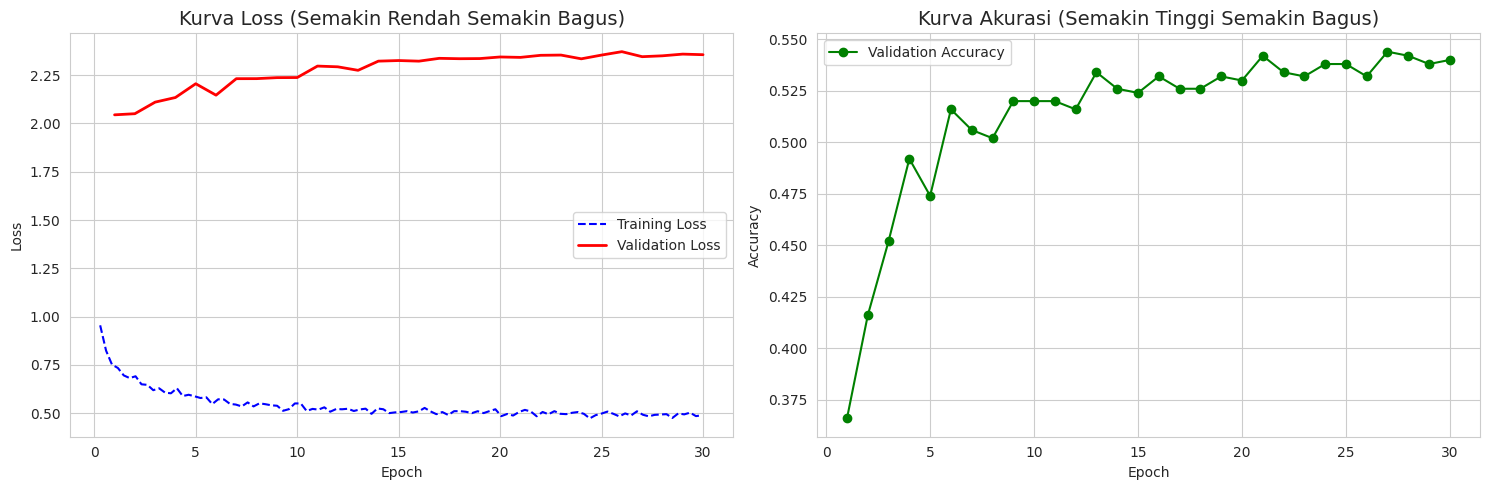

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Ambil Data Log dari Trainer
history = trainer.state.log_history
df = pd.DataFrame(history)

# 2. Pisahkan Data Training dan Data Validasi
# Training log biasanya punya key 'loss', Validation punya 'eval_loss'
train_loss = df[df['loss'].notna()][['epoch', 'loss']]
val_loss = df[df['eval_loss'].notna()][['epoch', 'eval_loss']]
val_acc = df[df['eval_accuracy'].notna()][['epoch', 'eval_accuracy']]

# 3. Plotting
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")

# --- Grafik 1: Loss (Training vs Validation) ---
plt.subplot(1, 2, 1)
plt.plot(train_loss['epoch'], train_loss['loss'], label='Training Loss', color='blue', linestyle='--')
plt.plot(val_loss['epoch'], val_loss['eval_loss'], label='Validation Loss', color='red', linewidth=2)
plt.title('Kurva Loss (Semakin Rendah Semakin Bagus)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# --- Grafik 2: Akurasi (Validation) ---
plt.subplot(1, 2, 2)
plt.plot(val_acc['epoch'], val_acc['eval_accuracy'], label='Validation Accuracy', color='green', marker='o')
plt.title('Kurva Akurasi (Semakin Tinggi Semakin Bagus)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

emot dataset

Confusion Matrix

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


📂 Sedang meload Model SMSA dari: saved_models/smsa_adalora_best ...
✅ Model berhasil diload! Siap untuk ujian.

🔍 Sedang menjalankan Prediksi (Manual Loop)...


/usr/local/lib/python3.11/dist-packages/peft/tuners/adalora/config.py:96: UserWarning: Note that `r` is not used in AdaLora and will be ignored.If you intended to set the initial rank, use `init_r` instead.
  warnings.warn(


Testing:   0%|          | 0/16 [00:00<?, ?it/s]


📊 Membuat Visualisasi...


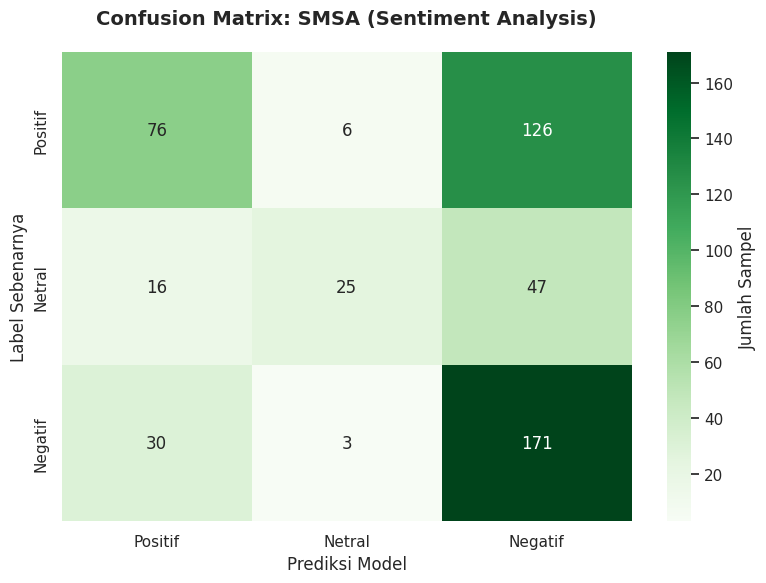


HASIL AKHIR SMSA (DARI SAVED MODEL)
              precision    recall  f1-score   support

     Positif     0.6230    0.3654    0.4606       208
      Netral     0.7353    0.2841    0.4098        88
     Negatif     0.4971    0.8382    0.6241       204

    accuracy                         0.5440       500
   macro avg     0.6184    0.4959    0.4982       500
weighted avg     0.5914    0.5440    0.5184       500



In [39]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding
from peft import PeftModel, PeftConfig
from datasets import load_from_disk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

# ==========================================
# 1. SETUP & LOAD MODEL YANG SUDAH JADI
# ==========================================
print("📂 Sedang meload Model SMSA dari: saved_models/smsa_adalora_best ...")

# A. Load Data SMSA
dataset = load_from_disk("processed_data/smsa_processed") 

# B. Label Mapping (Harus 3 kelas: Positif, Netral, Negatif)
id2label = {0: "positif", 1: "netral", 2: "negatif"}
label2id = {"positif": 0, "netral": 1, "negatif": 2}
label_names = ["Positif", "Netral", "Negatif"]

# C. Load Base Model (TinyBERT Polos)
checkpoint = "prajjwal1/bert-tiny"
base_model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, 
    num_labels=3, 
    id2label=id2label, 
    label2id=label2id
)

# D. Load "Otak" AdaLoRA yang sudah kamu simpan
model_path = "saved_models/smsa_adalora_best"

try:
    model = PeftModel.from_pretrained(base_model, model_path)
    print("✅ Model berhasil diload! Siap untuk ujian.")
except Exception as e:
    print(f"❌ Gagal load model di path: {model_path}")
    print(f"Error: {e}")
    print("Pastikan nama foldernya benar-benar ada.")
    # Stop eksekusi jika gagal load
    raise e

# ==========================================
# 2. INFERENCE MANUAL (ANTI-CRASH ADALORA)
# ==========================================
print("\n🔍 Sedang menjalankan Prediksi (Manual Loop)...")

# Setup Device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval() # Mode Evaluasi (Penting!)

# Setup DataLoader
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
test_loader = DataLoader(dataset["test"], batch_size=32, collate_fn=data_collator)

all_preds = []
all_labels = []

# Loop Prediksi
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        # Pindah ke GPU
        batch = {k: v.to(device) for k, v in batch.items()}
        labels = batch.pop("labels")
        
        # Forward Pass
        outputs = model(**batch)
        
        # Ambil prediksi (index dengan nilai tertinggi)
        preds = torch.argmax(outputs.logits, dim=-1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ==========================================
# 3. VISUALISASI HASIL
# ==========================================
print("\n📊 Membuat Visualisasi...")

# A. Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_names, yticklabels=label_names,
            cbar_kws={'label': 'Jumlah Sampel'})

plt.title('Confusion Matrix: SMSA (Sentiment Analysis)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya', fontsize=12)
plt.tight_layout()
plt.show()

# B. Laporan Klasifikasi
print("\n" + "="*50)
print("HASIL AKHIR SMSA (DARI SAVED MODEL)")
print("="*50)
report = classification_report(all_labels, all_preds, target_names=label_names, digits=4)
print(report)

In [28]:
import os

# Saya ubah nama foldernya jadi 'best' biar lebih jelas
save_path = "saved_models/smsa_adalora_best"
os.makedirs(save_path, exist_ok=True)

# 1. Simpan Model
# Karena load_best_model_at_end=True, ini OTOMATIS menyimpan checkpoint terbaik
trainer.save_model(save_path)

# 2. Simpan Tokenizer (Wajib sepaket)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenizer.save_pretrained(save_path)

print(f"✅ Best Model sukses disimpan di: {save_path}")

# 3. Cek Checkpoint Mana yang Dipilih
# Ini untuk memastikan dia tidak mengambil epoch 100
if trainer.state.best_model_checkpoint:
    print(f"ℹ️ Model ini diambil dari checkpoint: {trainer.state.best_model_checkpoint}")
else:
    print("ℹ️ Info checkpoint tidak tersedia, tapi model yang tersimpan tetap yang terbaik.")

✅ Best Model sukses disimpan di: saved_models/smsa_adalora_best
ℹ️ Model ini diambil dari checkpoint: model_output/smsa_adalora_tuned/checkpoint-4644


Emot

In [29]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from peft import get_peft_model, AdaLoraConfig, TaskType
from datasets import load_from_disk
import evaluate
import numpy as np

# --- 1. SETUP DATA & MODEL (Load Ulang Biar Bersih) ---
checkpoint = "prajjwal1/bert-tiny"
dataset = load_from_disk("processed_data/emot_processed") 

# Label Mapping untuk EMOT
id2label = {0: "sadness", 1: "anger", 2: "love", 3: "fear", 4: "happy"}
label2id = {"sadness": 0, "anger": 1, "love": 2, "fear": 3, "happy": 4}

# Load Model Baru (PENTING: Jangan pakai variabel 'model' bekas SMSA)
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, 
    num_labels=5,         # EMOT ada 5 label
    id2label=id2label,
    label2id=label2id
)

# --- 2. HITUNG ULANG STEPS (KHUSUS DATA EMOT) ---
BATCH_SIZE = 32
NUM_EPOCHS = 30 # Kita pakai 30 epoch sesuai strategi baru
train_samples = len(dataset["train"])

# Rumus Steps
total_steps = (train_samples // BATCH_SIZE) * NUM_EPOCHS
t_init_steps = int(total_steps * 0.15) 
t_final_steps = int(total_steps * 0.20) 

print(f"Data EMOT: {train_samples} sampel.")
print(f"Jadwal AdaLoRA: Init={t_init_steps}, Final={t_final_steps}, Total={total_steps}")

# --- 3. KONFIGURASI ADALORA (KODEMU) ---
peft_config = AdaLoraConfig(
    task_type=TaskType.SEQ_CLS, 
    r=32,            
    lora_alpha=64,   
    target_modules=["query", "value"], 
    lora_dropout=0.1, 
    bias="none",
    init_r=12, 
    target_r=8, 
    beta1=0.85, 
    beta2=0.85,
    tinit=t_init_steps,     # Sekarang variabel ini sudah benar isinya
    tfinal=t_final_steps,   # Sekarang variabel ini sudah benar isinya
    deltaT=10,
    total_step=total_steps  
)

# Bungkus model
model = get_peft_model(model, peft_config)
model.print_trainable_parameters() 

# --- 4. METRIC & TRAINER ---
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="model_output/emot_adalora_tuned",
    learning_rate=5e-4, 
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_EPOCHS,
    weight_decay=0.01,
    eval_strategy="epoch", 
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy", 
    greater_is_better=True,           
    save_total_limit=2,               
    logging_steps=50,   
    report_to="none",
)

# Custom Trainer (Fix Bug)
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        if "num_items_in_batch" in inputs:
            del inputs["num_items_in_batch"]
        return super().compute_loss(model, inputs, return_outputs)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"], 
    eval_dataset=dataset["test"], 
    tokenizer=AutoTokenizer.from_pretrained(checkpoint),
    compute_metrics=compute_metrics,
)

print("🚀 Mulai Training EMOT (Revisi Strategi)...")
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/peft/tuners/adalora/config.py:96: UserWarning: Note that `r` is not used in AdaLora and will be ignored.If you intended to set the initial rank, use `init_r` instead.
  warnings.warn(


Data EMOT: 3521 sampel.
Jadwal AdaLoRA: Init=495, Final=660, Total=3300
trainable params: 12,981 || all params: 4,399,550 || trainable%: 0.2951


/tmp/ipykernel_108/150180993.py:91: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


🚀 Mulai Training EMOT (Revisi Strategi)...


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.592900,2.398133,0.252273
2,1.574100,2.353929,0.279545
3,1.548300,2.320571,0.268182
4,1.524500,2.315135,0.306818
5,1.502700,2.322631,0.286364
6,1.467400,2.351621,0.295455
7,1.464400,2.324063,0.363636
8,1.427500,2.354804,0.350000
9,1.417600,2.369570,0.343182
10,1.383600,2.342220,0.375000


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=1680, training_loss=1.354858078275408, metrics={'train_runtime': 74.3562, 'train_samples_per_second': 1420.595, 'train_steps_per_second': 22.594, 'total_flos': 34635174497280.0, 'train_loss': 1.354858078275408, 'epoch': 30.0})

Visualisasi Loss dan akurasi

Sedang membuat grafik Kurva Belajar...


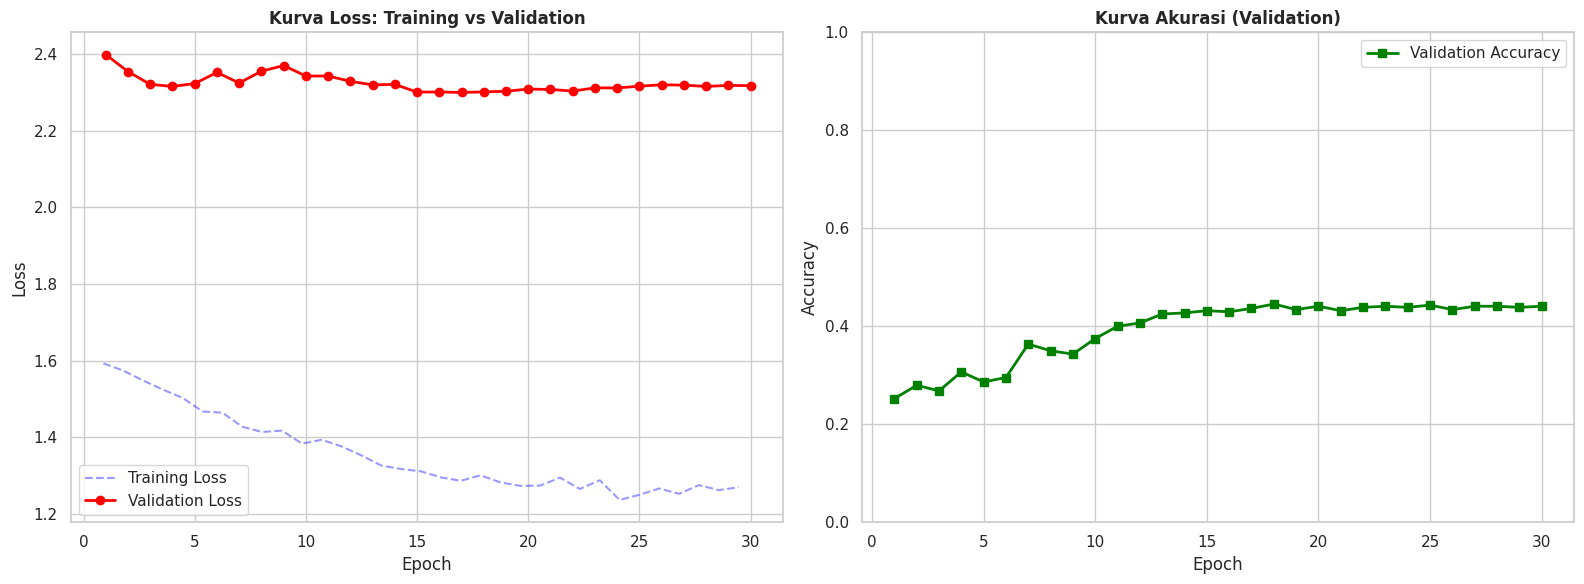

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


# ==========================================
# BAGIAN 1: VISUALISASI KURVA BELAJAR (VERSI AMAN)
# ==========================================
print("Sedang membuat grafik Kurva Belajar...")

# 1. Ambil history training
history = trainer.state.log_history
df = pd.DataFrame(history)

# 2. Pisahkan Data
# Data Training (Loss)
train_history = df[df['loss'].notna()]
# Data Validation (Loss & Accuracy)
val_history = df[df['eval_loss'].notna()]

# 3. Plotting
plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")

# --- Subplot 1: Grafik Loss ---
plt.subplot(1, 2, 1)

# Plot Training Loss (Sumbu X pakai Epoch)
plt.plot(train_history['epoch'], train_history['loss'], 
         label='Training Loss', color='blue', alpha=0.4, linestyle='--')

# Plot Validation Loss (Sumbu X pakai Epoch)
plt.plot(val_history['epoch'], val_history['eval_loss'], 
         label='Validation Loss', color='red', linewidth=2, marker='o')

plt.title('Kurva Loss: Training vs Validation', fontsize=12, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# --- Subplot 2: Grafik Akurasi ---
plt.subplot(1, 2, 2)
# Plot Validation Accuracy
plt.plot(val_history['epoch'], val_history['eval_accuracy'], 
         label='Validation Accuracy', color='green', linewidth=2, marker='s')

plt.title('Kurva Akurasi (Validation)', fontsize=12, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(bottom=0, top=1.0) # Skala 0 sampai 1
plt.legend()

plt.tight_layout()
plt.show()


Sedang melakukan prediksi pada Data Test...


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Sedang membuat Confusion Matrix...


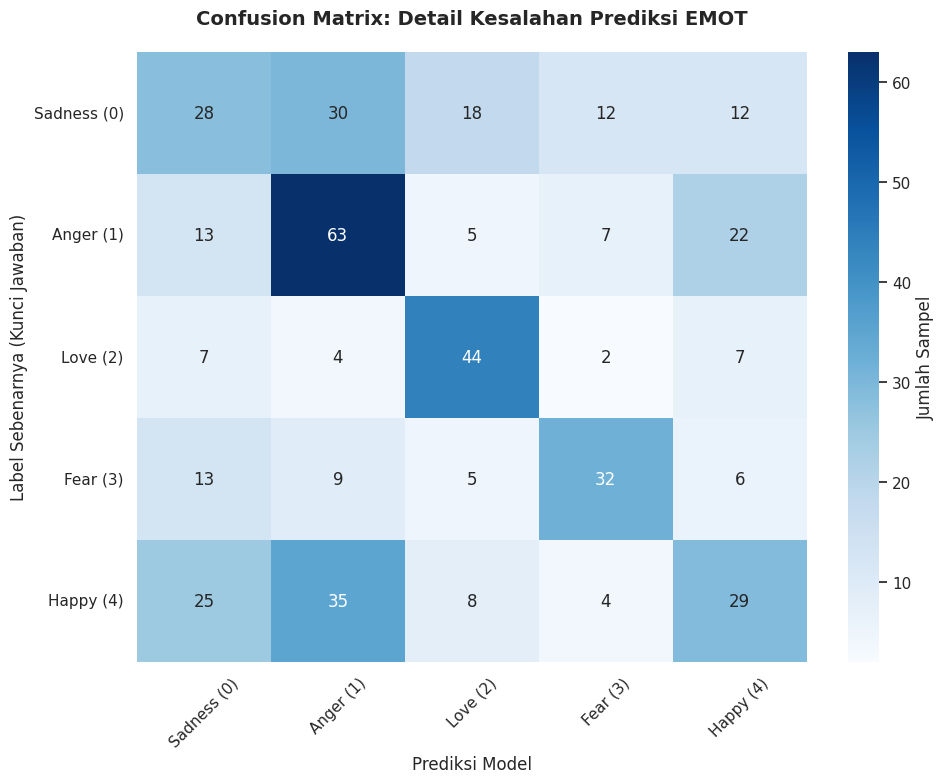


DETAIL PERFORMA PER KATEGORI EMOSI
              precision    recall  f1-score   support

 Sadness (0)     0.3256    0.2800    0.3011       100
   Anger (1)     0.4468    0.5727    0.5020       110
    Love (2)     0.5500    0.6875    0.6111        64
    Fear (3)     0.5614    0.4923    0.5246        65
   Happy (4)     0.3816    0.2871    0.3277       101

    accuracy                         0.4455       440
   macro avg     0.4531    0.4639    0.4533       440
weighted avg     0.4362    0.4455    0.4355       440



In [35]:
# ==========================================
# BAGIAN 1.5: LAKUKAN PREDIKSI DULU (INI YANG HILANG TADI)
# ==========================================
print("\nSedang melakukan prediksi pada Data Test...")

# 1. Suruh Trainer memprediksi data test
predictions_output = trainer.predict(dataset["test"])

# 2. Ambil hasil prediksi (y_pred) dan label asli (y_true)
y_pred = np.argmax(predictions_output.predictions, axis=1)
y_true = predictions_output.label_ids

# 3. Definisi Label (Harus urut 0-4 sesuai training)
label_names = ["Sadness (0)", "Anger (1)", "Love (2)", "Fear (3)", "Happy (4)"]

# ==========================================
# BAGIAN 2: VISUALISASI CONFUSION MATRIX
# ==========================================
print("Sedang membuat Confusion Matrix...")

# 4. Hitung Matriks
cm = confusion_matrix(y_true, y_pred)

# 5. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names,
            cbar_kws={'label': 'Jumlah Sampel'}, annot_kws={"size": 12})

plt.title('Confusion Matrix: Detail Kesalahan Prediksi EMOT', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Kunci Jawaban)', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ==========================================
# BAGIAN 3: LAPORAN ANGKA DETAIL (CLASSIFICATION REPORT)
# ==========================================
print("\n" + "="*50)
print("DETAIL PERFORMA PER KATEGORI EMOSI")
print("="*50)
# Menampilkan Precision, Recall, dan F1-Score untuk setiap emosi
report = classification_report(y_true, y_pred, target_names=label_names, digits=4)
print(report)

In [38]:
import os

# Nama folder penyimpanan
save_path = "saved_models/emot_adalora_best"
os.makedirs(save_path, exist_ok=True)

# 1. Simpan Model Adapter (Best Model)
trainer.save_model(save_path)

# 2. Simpan Tokenizer (Wajib sepaket)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenizer.save_pretrained(save_path)

print(f"✅ Model EMOT Terbaik sukses disimpan di: {save_path}")

# Cek model dari epoch berapa yang diambil
if trainer.state.best_model_checkpoint:
    print(f"ℹ️ Model ini adalah juara dari: {trainer.state.best_model_checkpoint}")

✅ Model EMOT Terbaik sukses disimpan di: saved_models/emot_adalora_best
ℹ️ Model ini adalah juara dari: model_output/emot_adalora_tuned/checkpoint-1008


train nerp

In [40]:
pip install seqeval

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=f2ea3ab47331ecfb75ad9ae131c5768088676268f1d83980c2560dab16e9f65c
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval
Note: you may need to restart the kernel to use updated packages.


In [72]:
# Cek Metadata Label
try:
    # Biasanya tersimpan di fitur 'ner_tags' atau 'labels'
    if "ner_tags" in dataset["train"].features:
        labels_names = dataset["train"].features["ner_tags"].feature.names
    else:
        labels_names = dataset["train"].features["labels"].feature.names
        
    print("✅ BERHASIL DITEMUKAN!")
    print(f"Total Label: {len(labels_names)}")
    print(f"Daftar Label: {labels_names}")
    
except Exception as e:
    print("⚠️ Gagal membaca metadata otomatis.")
    print("Label tersimpan sebagai angka mentah. Kita harus pakai nama sementara.")
    # Fallback: Buat label dummy biar training tetap jalan
    labels_names = ["O", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC", "B-MISC", "I-MISC", "LABEL_9", "LABEL_10"]
    print(f"Saran Label List Sementara: {labels_names}")

⚠️ Gagal membaca metadata otomatis.
Label tersimpan sebagai angka mentah. Kita harus pakai nama sementara.
Saran Label List Sementara: ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC', 'LABEL_9', 'LABEL_10']


In [85]:
import torch
from transformers import (
    AutoTokenizer, 
    AutoModelForTokenClassification, 
    DataCollatorForTokenClassification,
    TrainingArguments,
    Trainer
)
from peft import get_peft_model, AdaLoraConfig, TaskType
from datasets import load_from_disk
import evaluate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

from datasets import load_from_disk, concatenate_datasets

# ==========================================
# 1. PERSIAPAN DATA (PAKSA SPLIT 80:20)
# ==========================================
print("🚀 Memulai Pipeline Training NERP...")

# Load Data Mentah
try:
    dataset_raw = load_from_disk("processed_data/nerp_processed")
    print("✅ Dataset raw berhasil diload.")
except:
    raise ValueError("❌ Folder 'processed_data/nerp_processed' tidak ditemukan!")

# --- LOGIKA BARU: FORCE RESPLIT 0.2 ---
print("🔄 Sedang membagi ulang dataset menjadi 80% Train : 20% Test...")

# Cek apakah dataset ini berbentuk Dictionary (sudah ada train/test-nya)
if isinstance(dataset_raw, dict) or hasattr(dataset_raw, "keys"):
    keys = list(dataset_raw.keys())
    if "train" in keys and "test" in keys:
        # Kasus: Sudah terlanjur dibagi (misal 90/10), kita gabung dulu
        full_data = concatenate_datasets([dataset_raw["train"], dataset_raw["test"]])
        dataset = full_data.train_test_split(test_size=0.2) # <--- DISINI KITA UBAH JADI 0.2
    elif "train" in keys:
        # Kasus: Cuma ada train, langsung split
        dataset = dataset_raw["train"].train_test_split(test_size=0.2)
    else:
        # Kasus: Dataset tunggal (belum diapa-apain)
        dataset = dataset_raw.train_test_split(test_size=0.2)
else:
    # Jaga-jaga kalau formatnya lain
    dataset = dataset_raw.train_test_split(test_size=0.2)

# Validasi Kolom (Anti-Gado-Gado)
sample_cols = dataset["train"].column_names
if "labels" not in sample_cols and "ner_tags" not in sample_cols:
    raise ValueError(f"❌ INI BUKAN DATA NER! Kolom: {sample_cols}")

print(f"✅ DATA READY! Train: {len(dataset['train'])}, Test: {len(dataset['test'])}")
print(f"   (Rasio Test: {len(dataset['test']) / (len(dataset['train']) + len(dataset['test'])):.2%})")

# ==========================================
# 2. CONFIG MODEL & LABEL
# ==========================================
# Definisi 11 Label (Sesuaikan urutan jika beda)
label_list = [
    "O", "B-PER", "I-PER", "B-ORG", "I-ORG", 
    "B-LOC", "I-LOC", "B-MISC", "I-MISC", 
    "LABEL_9", "LABEL_10"
]
id2label = {i: l for i, l in enumerate(label_list)}
label2id = {l: i for i, l in enumerate(label_list)}

checkpoint = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

# Load Base Model
model = AutoModelForTokenClassification.from_pretrained(
    checkpoint, num_labels=len(label_list), id2label=id2label, label2id=label2id
)

# Config AdaLoRA (STRICT NER MODE)
peft_config = AdaLoraConfig(
    task_type=TaskType.TOKEN_CLS,  # <--- WAJIB TOKEN_CLS UNTUK NER
    inference_mode=False, 
    r=16, lora_alpha=32, lora_dropout=0.1, bias="none",
    target_modules=["query", "value"],
    init_r=12, target_r=8, beta1=0.85, beta2=0.85,
    tinit=200, tfinal=1000, deltaT=10, total_step=10000 
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

# ==========================================
# 3. METRIK & TRAINING
# ==========================================
seqeval = evaluate.load("seqeval")

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Filter -100 (Padding)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

# Custom Trainer (Anti-Bug)
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        if "num_items_in_batch" in inputs: del inputs["num_items_in_batch"]
        return super().compute_loss(model, inputs, return_outputs)

training_args = TrainingArguments(
    output_dir="model_output/nerp_adalora_final",
    learning_rate=1e-3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10, # Coba 10 epoch biar kelihatan grafiknya
    weight_decay=0.01,
    save_strategy="epoch",
    eval_strategy="epoch", # Versi baru Transformers
    logging_steps=50,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics # Metrik dimasukkan disini
)

print("\n⏳ Sedang Melatih Model NER...")
trainer.train()


🚀 Memulai Pipeline Training NERP...
✅ Dataset raw berhasil diload.
🔄 Sedang membagi ulang dataset menjadi 80% Train : 20% Test...
✅ DATA READY! Train: 6048, Test: 1512
   (Rasio Test: 20.00%)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/peft/tuners/adalora/config.py:96: UserWarning: Note that `r` is not used in AdaLora and will be ignored.If you intended to set the initial rank, use `init_r` instead.
  warnings.warn(


trainable params: 13,755 || all params: 4,384,586 || trainable%: 0.3137


/tmp/ipykernel_108/131249967.py:141: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(
No label_names provided for model class `PeftModelForTokenClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.



⏳ Sedang Melatih Model NER...


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.058400,1.454667,0.206320,0.039052,0.065674,0.851700
2,0.622000,1.900299,0.289367,0.075642,0.119933,0.856574
3,0.560300,2.063557,0.368297,0.128064,0.190045,0.863583
4,0.553400,2.158654,0.393215,0.156327,0.223714,0.866870
5,0.528000,2.197890,0.406000,0.166647,0.236302,0.868947
6,0.514200,2.196285,0.410920,0.167703,0.238194,0.870014
7,0.510900,2.199015,0.420979,0.177436,0.249649,0.871312
8,0.509300,2.199656,0.431286,0.194324,0.267928,0.872841
9,0.507100,2.196447,0.435945,0.193151,0.267696,0.873302
10,0.504400,2.196871,0.435772,0.197725,0.272023,0.873389


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LABEL_9 seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LABEL_10 seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LABEL_9 

TrainOutput(global_step=950, training_loss=0.5652217463443153, metrics={'train_runtime': 58.7266, 'train_samples_per_second': 1029.857, 'train_steps_per_second': 16.177, 'total_flos': 19135817809920.0, 'train_loss': 0.5652217463443153, 'epoch': 10.0})

In [86]:

# SIMPAN MODEL
save_path = "saved_models/nerp_adalora_best"
trainer.save_model(save_path)
tokenizer.save_pretrained(save_path)
print(f"\n💾 Model Berhasil Disimpan di: {save_path}")


💾 Model Berhasil Disimpan di: saved_models/nerp_adalora_best


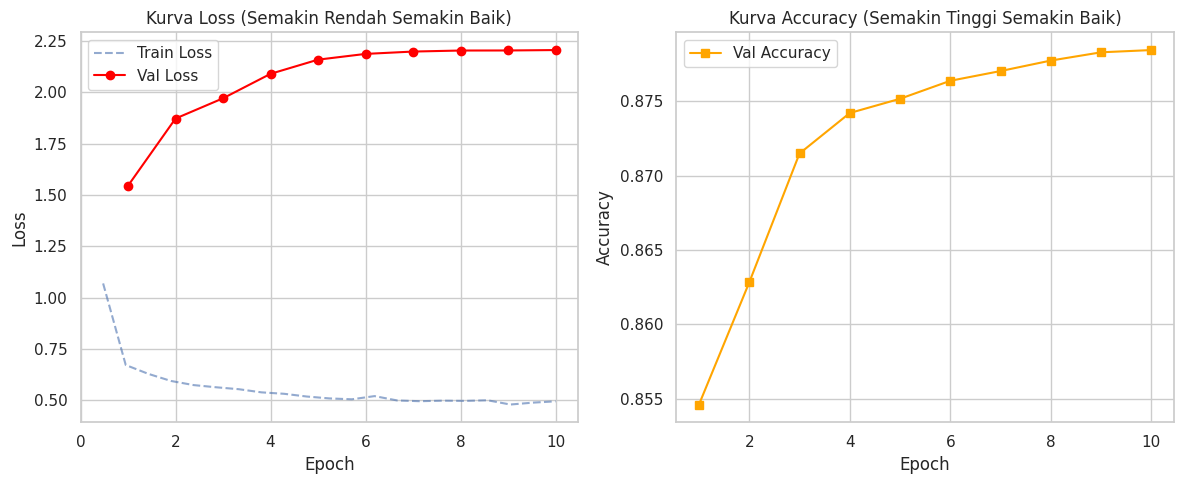

In [87]:
# A. Kurva Loss & Accuracy
plt.figure(figsize=(12, 5))

# Grafik Loss (Kiri)
plt.subplot(1, 2, 1)
# Plot Training Loss (Garis biru putus-putus)
loss_data = history.dropna(subset=['loss'])
plt.plot(loss_data['epoch'], loss_data['loss'], label='Train Loss', alpha=0.6, linestyle='--')

# Plot Validation Loss (Garis merah bulat)
if 'eval_loss' in history.columns: 
    val_loss_data = history.dropna(subset=['eval_loss'])
    plt.plot(val_loss_data['epoch'], val_loss_data['eval_loss'], label='Val Loss', marker='o', color='red')

plt.title("Kurva Loss (Semakin Rendah Semakin Baik)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Grafik Accuracy (Kanan) - PENGGANTI F1
plt.subplot(1, 2, 2)
if 'eval_accuracy' in history.columns:
    val_acc_data = history.dropna(subset=['eval_accuracy'])
    plt.plot(val_acc_data['epoch'], val_acc_data['eval_accuracy'], label='Val Accuracy', marker='s', color='orange')
    plt.title("Kurva Accuracy (Semakin Tinggi Semakin Baik)")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
else:
    # Jaga-jaga kalau key-nya beda, kadang bisa 'eval_overall_accuracy' tergantung versi library
    print("⚠️ Kolom 'eval_accuracy' tidak ditemukan di history. Cek nama kolom history.columns")

plt.tight_layout()
plt.show()


📊 Membuat Confusion Matrix...


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LABEL_9 seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LABEL_10 seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


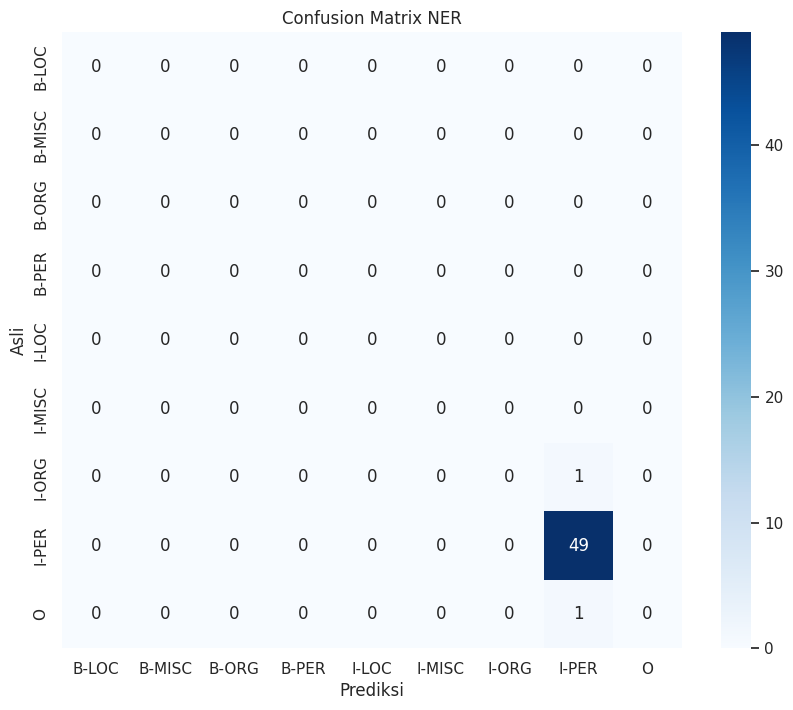


🏆 DETAIL RAPOR:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-LOC     0.0000    0.0000    0.0000       128
      B-MISC     0.0000    0.0000    0.0000      1076
       B-ORG     0.0000    0.0000    0.0000       535
       B-PER     0.0000    0.0000    0.0000       223
       I-LOC     0.0000    0.0000    0.0000       372
      I-MISC     0.0000    0.0000    0.0000       438
       I-ORG     0.0000    0.0000    0.0000       749
       I-PER     0.9608    0.0506    0.0962       968
           O     0.0000    0.0000    0.0000       620

   micro avg     0.9608    0.0096    0.0190      5109
   macro avg     0.1068    0.0056    0.0107      5109
weighted avg     0.1820    0.0096    0.0182      5109



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:


# B. Confusion Matrix
print("\n📊 Membuat Confusion Matrix...")
predictions, labels, _ = trainer.predict(dataset["test"])
predictions = np.argmax(predictions, axis=2)

true_labels = []
true_preds = []

for i in range(len(labels)):
    for j in range(len(labels[i])):
        if labels[i][j] != -100:
            true_labels.append(label_list[labels[i][j]])
            true_preds.append(label_list[predictions[i][j]])

unique_labels = sorted(list(set(true_labels + true_preds)))
display_labels = [l for l in unique_labels if "LABEL" not in l] # Buang label sampah

cm = confusion_matrix(true_labels, true_preds, labels=display_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=display_labels, yticklabels=display_labels)
plt.title('Confusion Matrix NER')
plt.ylabel('Asli')
plt.xlabel('Prediksi')
plt.show()

print("\n🏆 DETAIL RAPOR:")
print(classification_report(true_labels, true_preds, labels=display_labels, digits=4))

TRAIN NL QA

In [43]:
import torch
from transformers import (
    AutoModelForQuestionAnswering, 
    AutoTokenizer, 
    TrainingArguments, 
    Trainer,
    DefaultDataCollator
)
from peft import get_peft_model, AdaLoraConfig, TaskType
from datasets import load_from_disk
import numpy as np

# --- 1. SETUP DATA & MODEL ---
checkpoint = "prajjwal1/bert-tiny"
dataset_raw = load_from_disk("processed_data/squad_processed") 

# --- PERBAIKAN DI SINI ---
# Karena dataset_raw tidak punya key 'train', kita buat split sendiri
# 90% buat Training, 10% buat Validasi/Ujian
print("Sedang membagi dataset menjadi Train & Validation...")
dataset = dataset_raw.train_test_split(test_size=0.1)

print(f"✅ Data Siap! Train: {len(dataset['train'])}, Test: {len(dataset['test'])}")

# Load Model QA
model = AutoModelForQuestionAnswering.from_pretrained(checkpoint)

# --- 2. CONFIG ADALORA ---
BATCH_SIZE = 32
NUM_EPOCHS = 20 
train_samples = len(dataset["train"]) # Sekarang sudah aman pakai key 'train'

# Rumus Steps
total_steps = (train_samples // BATCH_SIZE) * NUM_EPOCHS

peft_config = AdaLoraConfig(
    task_type=TaskType.QUESTION_ANS, # <--- PENTING: QA
    inference_mode=False, 
    r=8, 
    lora_alpha=32, 
    target_modules=["query", "value"],
    lora_dropout=0.01, 
    bias="none",
    init_r=12, 
    target_r=8, 
    beta1=0.85, 
    beta2=0.85, 
    tinit=int(total_steps * 0.1),  
    tfinal=int(total_steps * 0.2), 
    deltaT=10, 
    total_step=total_steps
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

# --- 3. DATA COLLATOR ---
data_collator = DefaultDataCollator()

# --- 4. CUSTOM TRAINER (ANTI BUG) ---
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        if "num_items_in_batch" in inputs:
            del inputs["num_items_in_batch"]
        return super().compute_loss(model, inputs, return_outputs)

# --- 5. TRAINING ARGUMENTS ---
training_args = TrainingArguments(
    output_dir="model_output/squad_adalora",
    learning_rate=1e-3,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_EPOCHS,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_steps=10,
    report_to="none"
)

trainer = CustomTrainer( 
    model=model,
    args=training_args,
    train_dataset=dataset["train"], # Ambil dari hasil split tadi
    eval_dataset=dataset["test"],   # Ambil dari hasil split tadi
    tokenizer=AutoTokenizer.from_pretrained(checkpoint),
    data_collator=data_collator,
)

print("Mulai Training QA SQuAD...")
trainer.train()

Sedang membagi dataset menjadi Train & Validation...
✅ Data Siap! Train: 123891, Test: 13766


Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 12,594 || all params: 4,382,264 || trainable%: 0.2874


/tmp/ipykernel_108/45912059.py:82: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(
No label_names provided for model class `PeftModelForQuestionAnswering`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Mulai Training QA SQuAD...


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.205000,5.284616
2,3.180000,5.223557
3,2.948800,5.149076
4,2.970500,5.090253
5,2.967600,5.051373
6,3.033300,5.015667
7,2.838400,4.980538
8,2.967000,4.973375
9,2.749900,4.968240
10,2.935800,4.962708


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=38720, training_loss=2.9062284860236587, metrics={'train_runtime': 3200.1365, 'train_samples_per_second': 774.286, 'train_steps_per_second': 12.099, 'total_flos': 2338684024135680.0, 'train_loss': 2.9062284860236587, 'epoch': 20.0})

📊 Sedang membuat Grafik Kurva Belajar NERP...
Kolom yang tersedia di log validasi: ['loss', 'grad_norm', 'learning_rate', 'epoch', 'step', 'eval_loss', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'train_runtime', 'train_samples_per_second', 'train_steps_per_second', 'total_flos', 'train_loss']


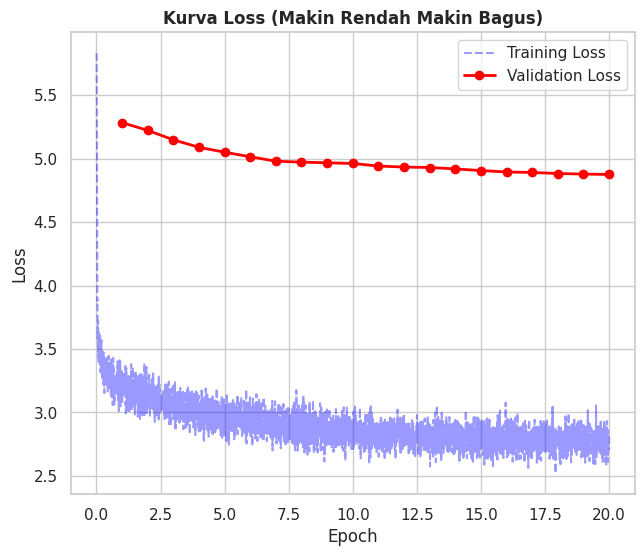

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ==========================================
# 1. VISUALISASI KURVA TRAINING (VERSI AMAN)
# ==========================================
print("📊 Sedang membuat Grafik Kurva Belajar NERP...")

# 1. Ambil history
history = trainer.state.log_history
df = pd.DataFrame(history)

# 2. Pisahkan Data
train_history = df[df['loss'].notna()]
val_history = df[df['eval_loss'].notna()]

# --- DEBUGGING: CEK KOLOM APA YANG ADA ---
print("Kolom yang tersedia di log validasi:", val_history.columns.tolist())

plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")

# --- Grafik 1: LOSS ---
plt.subplot(1, 2, 1)
plt.plot(train_history['epoch'], train_history['loss'], 
         label='Training Loss', color='blue', alpha=0.4, linestyle='--')
plt.plot(val_history['epoch'], val_history['eval_loss'], 
         label='Validation Loss', color='red', linewidth=2, marker='o')

plt.title('Kurva Loss (Makin Rendah Makin Bagus)', fontsize=12, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()

In [69]:
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, DefaultDataCollator
from datasets import load_from_disk
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import pandas as pd
import numpy as np

# ==========================================
# 1. SETUP DATA QA (YANG SUDAH BENAR)
# ==========================================
print("🚀 Mempersiapkan Data QA...")

# Load Data (Ini adalah Dataset QA Single)
dataset_raw = load_from_disk("processed_data/squad_processed") # Pastikan path ini benar

# KITA PECAH JADI DUA (Train & Test)
# Biar bisa dipanggil dataset['train'] dan dataset['test']
dataset = dataset_raw.train_test_split(test_size=0.1) 
print(f"✅ Data Siap! Train: {len(dataset['train'])}, Test: {len(dataset['test'])}")

# ==========================================
# 2. SETUP MODEL & TOKENIZER
# ==========================================
checkpoint = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Pakai Base Model QA (Belum fine-tuned, jadi jawaban mungkin masih ngaco, tapi formatnya benar)
model = AutoModelForQuestionAnswering.from_pretrained(checkpoint)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ==========================================
# 3. VISUALISASI JAWABAN
# ==========================================
print("\n🔍 Mulai Visualisasi QA...")

data_collator = DefaultDataCollator()
# Ambil 10 sampel dari data test
eval_loader = DataLoader(dataset["test"].select(range(10)), batch_size=1, collate_fn=data_collator)

results = []

with torch.no_grad():
    for batch in tqdm(eval_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        
        # Forward Pass (Model QA)
        outputs = model(**batch)
        start_logits = outputs.start_logits
        end_logits = outputs.end_logits
        
        # 1. PREDISKI MODEL
        answer_start = torch.argmax(start_logits)
        answer_end = torch.argmax(end_logits) + 1
        
        input_ids = batch["input_ids"][0].cpu().tolist()
        pred_tokens = input_ids[answer_start : answer_end]
        pred_text = tokenizer.decode(pred_tokens, skip_special_tokens=True)
        
        # 2. KUNCI JAWABAN (DARI DATASET)
        # Ambil posisi start/end asli dari data
        if "start_positions" in batch:
            true_start = batch["start_positions"][0].item()
            true_end = batch["end_positions"][0].item() + 1
            true_tokens = input_ids[true_start : true_end]
            true_text = tokenizer.decode(true_tokens, skip_special_tokens=True)
        else:
            true_text = "N/A"

        results.append({
            "Jawaban Model": pred_text,
            "Kunci Jawaban": true_text,
            "Cek": "✅" if pred_text == true_text and pred_text != "" else "❌"
        })

# Tampilkan Tabel
df = pd.DataFrame(results)
print("\n=== HASIL VISUALISASI QA (SQuAD) ===")
pd.set_option('display.max_colwidth', None)
print(df)

🚀 Mempersiapkan Data QA...
✅ Data Siap! Train: 123891, Test: 13766


Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🔍 Mulai Visualisasi QA...


  0%|          | 0/10 [00:00<?, ?it/s]


=== HASIL VISUALISASI QA (SQuAD) ===
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Jawaban Model  \
0                                                                                                                                                          

Save model

In [63]:
import os
save_path = "saved_models/squad_adalora_best"
os.makedirs(save_path, exist_ok=True)

trainer.save_model(save_path)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenizer.save_pretrained(save_path)

print(f"✅ Model QA tersimpan di: {save_path}")

✅ Model QA tersimpan di: saved_models/squad_adalora_best


NLG

In [70]:
pip install rouge_score

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [71]:
import torch
from transformers import (
    AutoModelForSeq2SeqLM, 
    AutoTokenizer, 
    Seq2SeqTrainingArguments, 
    Seq2SeqTrainer,
    DataCollatorForSeq2Seq
)
from peft import get_peft_model, AdaLoraConfig, TaskType
from datasets import load_from_disk
import evaluate
import numpy as np

# --- 1. SETUP DATA & MODEL ---
model_checkpoint = "google/mt5-small"
dataset_raw = load_from_disk("processed_data/wikilingua_mt5_processed") 

# --- CEK STRUKTUR & PERBAIKAN ---
print(f"Struktur Awal: {dataset_raw}")

# Jika dataset bukan Dictionary (tidak punya key 'train'), kita split manual
if "train" not in dataset_raw:
    print("⚠️ Dataset belum di-split. Melakukan split otomatis 90/10...")
    dataset = dataset_raw.train_test_split(test_size=0.1)
else:
    dataset = dataset_raw

print(f"✅ Data Siap! Train: {len(dataset['train'])}, Test: {len(dataset['test'])}")

# Load Tokenizer & Model
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

# --- 2. CONFIG ADALORA (Khusus T5) ---
BATCH_SIZE = 8 
NUM_EPOCHS = 10 
# Sekarang aman akses ["train"] karena sudah di-split di atas
train_samples = len(dataset["train"]) 
total_steps = (train_samples // BATCH_SIZE) * NUM_EPOCHS

peft_config = AdaLoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM, # <--- Task Type SEQ2SEQ
    inference_mode=False, 
    r=8, 
    lora_alpha=32, 
    target_modules=["q", "v"], # Target Module T5
    lora_dropout=0.01, 
    bias="none",
    init_r=12, 
    target_r=8, 
    beta1=0.85, 
    beta2=0.85, 
    tinit=int(total_steps * 0.1),  
    tfinal=int(total_steps * 0.2), 
    deltaT=10, 
    total_step=total_steps
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

# --- 3. DATA COLLATOR ---
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# --- 4. METRIC (ROUGE) ---
rouge = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    
    # Ganti -100 dengan pad token
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)
    
    return {k: round(v, 4) for k, v in result.items()}

# --- 5. TRAINING ARGUMENTS ---
training_args = Seq2SeqTrainingArguments(
    output_dir="model_output/wikilingua_adalora",
    learning_rate=1e-3,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_EPOCHS,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    predict_with_generate=True, # Wajib untuk summarization
    fp16=False,                 
    logging_steps=10,
    report_to="none"
)

# --- 6. TRAINER ---
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("Mulai Training Summarization...")
trainer.train()

Struktur Awal: Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 16308
})
⚠️ Dataset belum di-split. Melakukan split otomatis 90/10...
✅ Data Siap! Train: 14677, Test: 1631


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

trainable params: 516,672 || all params: 300,693,488 || trainable%: 0.1718


/tmp/ipykernel_108/3161961847.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Mulai Training Summarization...


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
# 1. Simpan
save_path = "saved_models/wikilingua_adalora_best"
trainer.save_model(save_path)
tokenizer.save_pretrained(save_path)
print("✅ Model Summarization Tersimpan!")


In [ ]:

# 2. Test Prediksi
from peft import PeftModel
base_model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small")
model_summ = PeftModel.from_pretrained(base_model, save_path)
model_summ = model_summ.to("cpu") # Pindah ke CPU buat inferensi simpel

text = "Jokowi meresmikan jalan tol baru di Sumatera. Jalan tol ini diharapkan dapat mempercepat distribusi logistik antar provinsi dan meningkatkan ekonomi daerah sekitar."

inputs = tokenizer(text, return_tensors="pt").input_ids
outputs = model_summ.generate(inputs, max_new_tokens=50)
print("\nRingkasan:", tokenizer.decode(outputs[0], skip_special_tokens=True))